In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # for plot styling
# %matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
from matplotlib import rcParams


In [2]:
with open("all_cluster_genome_num_occupy.txt") as f:
    label=[]
    not_found=[]
    unoccupy=[]
    occupy=[]
    not_found1=[]
    unoccupy1=[]
    occupy1=[]
    for i in f:
        i=i.strip().split(",")
#         print(i)
        label.append(i[0])
        not_found.append((int(i[1])-int(i[2])-int(i[3])))
        unoccupy.append(int(i[2]))
        occupy.append(int(i[3]))
        not_found1.append((int(i[1])-int(i[2])-int(i[3]))/4870)
        unoccupy1.append(int(i[2])/4870)
        occupy1.append(int(i[3])/4870)
    
    dataset=pd.DataFrame({'label':label,'Hotspot not_found':not_found,'Unoccupied hotspot':unoccupy,'Occupied hotspot':occupy})
        
    print(np.array(occupy) + np.array(unoccupy))

[4428 4740 4604 4170  330 3557 3596 1633 4602  569 4043 3985 4732 4784
 4031 4429 2170 4827 4539 3829]


In [3]:
with open("all_hotspot_df_no_df_genome_num_fin_sort.txt") as f:
    label=[]
    not_found=[]
    unoccupy=[]
    occupy=[]
    not_found1=[]
    unoccupy1=[]
    occupy1=[]
    for i in f:
        i=i.strip().split("\t")
#         print(i)
        label.append(i[0])
        not_found.append((int(i[1])-int(i[2]))/4870)
        unoccupy.append(int(i[4])/4870)
        occupy.append(int(i[3])/4870)
        not_found1.append((int(i[1])-int(i[2])-int(i[3]))/4870)
        unoccupy1.append(int(i[2])/4870)
        occupy1.append(int(i[3])/4870)
    
    dataset=pd.DataFrame({'label':label,'Hotspot not_found':not_found,'Unoccupied hotspot':unoccupy,'Occupied hotspot':occupy})
        
    print(np.array(occupy) + np.array(unoccupy))

[0.90924025 0.97330595 0.94537988 0.85626283 0.06776181 0.73039014
 0.73839836 0.33531828 0.9449692  0.11683778 0.8301848  0.81827515
 0.97166324 0.98234086 0.82772074 0.90944559 0.44558522 0.99117043
 0.93203285 0.7862423 ]


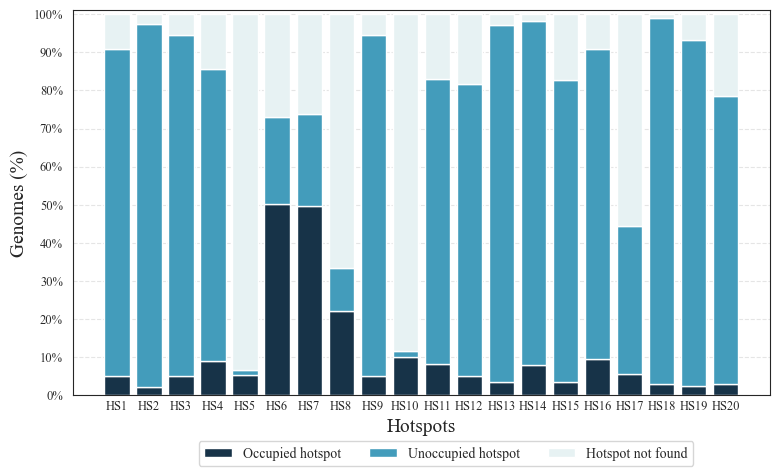

In [4]:
fig = plt.figure(figsize=(9,5))
sns.set_style("white")
# sns.set_style("white")
config = {
    "font.family":'Times New Roman',  # 设置字体类型
#     "font.size": 80,
    "mathtext.fontset":'stix'
}
rcParams.update(config)
plt.bar(label, occupy, color="#173348", label="Occupied hotspot")
# 第二根柱子“堆积”在第一根柱子上方，通过'bottom'调整，显示第二种产品的销量
plt.bar(label,unoccupy,color="#439CBB", label="Unoccupied hotspot",bottom=occupy)
# 第三根柱子“堆积”在第二根柱子上方，通过'bottom'调整，显示第三种产品的销量
plt.bar(label,not_found, color="#E7F2F3", 
       bottom=np.array(occupy) + np.array(unoccupy), label="Hotspot not found")
plt.tick_params(axis='x',length=0)
plt.xlabel('Hotspots',fontsize=14)
plt.ylabel('Genomes (%)',fontsize=14)
plt.ylim(0,1.01)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.yticks(np.arange(0,1.1,0.1),[f'{i}%' for i in range(0,110,10)])
plt.grid(axis='y',alpha=0.5,ls='--')
plt.legend(bbox_to_anchor=(0.9,-0.1),ncol=3)
# plt.savefig("new_hotspots_occupy_fin.png",bbox_inches = 'tight',dpi=800)